# Stock Price prediction using Facebook Prophet 

## Importing all the necessary Libraries

In [ ]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet
import plotly.io as pio
pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [ ]:
#I have used the data of Berkshire Hathaway from Yahoo Finance (https://in.finance.yahoo.com/) you can download the data of any other stock and Predict the Price of that particular text
#df = pd.read_csv("/content/your_stock.csv")
df = pd.read_csv("/content/BRK-A.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10409.000000,10409.000000,10409.000000,10409.000000,10409.000000,10409.000000
mean,89740.349409,90323.536075,89109.696897,89737.966567,89737.966567,297.963973
std,97462.275733,98060.939458,96801.784740,97438.007882,97438.007882,579.589690
min,245.000000,245.000000,245.000000,245.000000,245.000000,0.000000
25%,7350.000000,7425.000000,7275.000000,7400.000000,7400.000000,30.000000
50%,68400.000000,69000.000000,67900.000000,68500.000000,68500.000000,180.000000
75%,122095.000000,122950.000000,121372.000000,122300.000000,122300.000000,400.000000
max,441063.000000,445000.000000,439132.000000,439460.000000,439460.000000,27402.000000


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
px.area(df,x='Date',y='Close')

In [ ]:
px.line(df,x='Date',y='Close')

In [ ]:
px.area(df,x='Date',y='Volume')

## Data Preperation

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,290.0,310.0,290.0,290.0,290.0,100
1,1980-03-18,290.0,290.0,290.0,290.0,290.0,0
2,1980-03-19,290.0,310.0,290.0,290.0,290.0,200
3,1980-03-20,290.0,290.0,290.0,290.0,290.0,0
4,1980-03-21,290.0,290.0,290.0,290.0,290.0,0


In [ ]:
column = ['Date','Close']
ndf = pd.DataFrame(df,columns=column)  
ndf

,Date,Close
0,1980-03-17,290.0
1,1980-03-18,290.0
2,1980-03-19,290.0
3,1980-03-20,290.0
4,1980-03-21,290.0
...,...,...
10404,2021-06-21,417780.0
10405,2021-06-22,418875.0
10406,2021-06-23,413890.0
10407,2021-06-24,415000.0


In [ ]:
prophet_df = ndf.rename(columns={'Date' :'ds' , 'Close':'y'})
prophet_df

,ds,y
0,1980-03-17,290.0
1,1980-03-18,290.0
2,1980-03-19,290.0
3,1980-03-20,290.0
4,1980-03-21,290.0
...,...,...
10404,2021-06-21,417780.0
10405,2021-06-22,418875.0
10406,2021-06-23,413890.0
10407,2021-06-24,415000.0


## Creating Facebook Prophet Model

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-03-17,14.100550,-14519.580338,15654.299302,14.100550,14.100550,752.396291,752.396291,752.396291,-134.374171,-134.374171,-134.374171,886.770462,886.770462,886.770462,0.0,0.0,0.0,766.496841
1,1980-03-18,15.000554,-13003.077197,15966.725765,15.000554,15.000554,770.093300,770.093300,770.093300,-47.744315,-47.744315,-47.744315,817.837615,817.837615,817.837615,0.0,0.0,0.0,785.093854
2,1980-03-19,15.900558,-13074.786005,15781.240609,15.900558,15.900558,695.363554,695.363554,695.363554,-53.787804,-53.787804,-53.787804,749.151358,749.151358,749.151358,0.0,0.0,0.0,711.264112
3,1980-03-20,16.800561,-13924.064184,14796.027937,16.800561,16.800561,616.538298,616.538298,616.538298,-65.058934,-65.058934,-65.058934,681.597232,681.597232,681.597232,0.0,0.0,0.0,633.338859
4,1980-03-21,17.700565,-13510.454168,14852.227004,17.700565,17.700565,640.691766,640.691766,640.691766,24.625017,24.625017,24.625017,616.066748,616.066748,616.066748,0.0,0.0,0.0,658.392331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10434,2021-07-21,363132.813160,347703.783384,374980.780748,363132.813160,363132.813160,-1853.459308,-1853.459308,-1853.459308,-53.787804,-53.787804,-53.787804,-1799.671504,-1799.671504,-1799.671504,0.0,0.0,0.0,361279.353853
10435,2021-07-22,363201.684327,347449.604254,374678.749401,363201.684327,363201.684327,-1820.557330,-1820.557330,-1820.557330,-65.058934,-65.058934,-65.058934,-1755.498396,-1755.498396,-1755.498396,0.0,0.0,0.0,361381.126997
10436,2021-07-23,363270.555494,346132.519435,375425.722155,363270.555494,363270.555494,-1686.911563,-1686.911563,-1686.911563,24.625017,24.625017,24.625017,-1711.536580,-1711.536580,-1711.536580,0.0,0.0,0.0,361583.643931
10437,2021-07-24,363339.426661,348214.696134,375527.383081,363339.426661,363339.426661,-1529.873517,-1529.873517,-1529.873517,138.170308,138.170308,138.170308,-1668.043825,-1668.043825,-1668.043825,0.0,0.0,0.0,361809.553144


##Forecasting

In [ ]:
px.line(forecast , x = 'ds' , y = 'yhat')

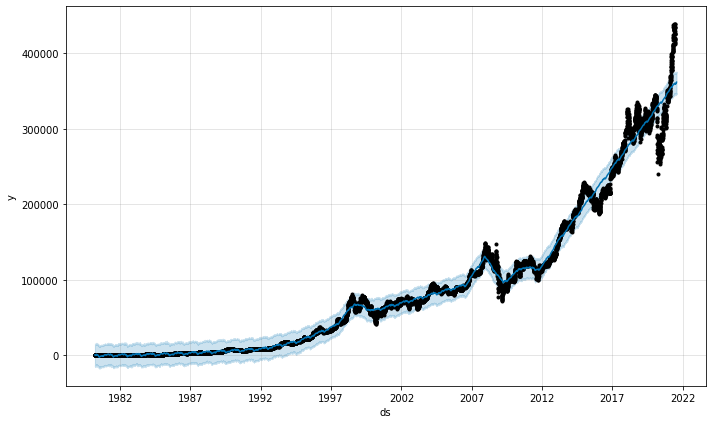

In [ ]:
figure = m.plot(forecast , xlabel='ds',ylabel='y')

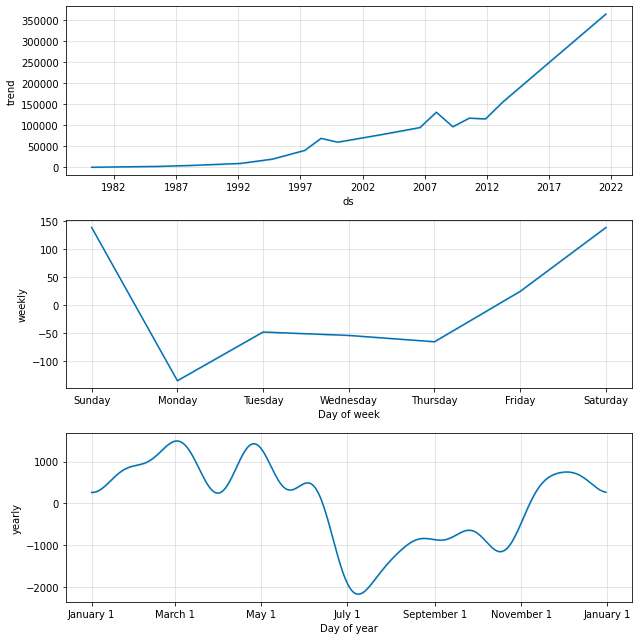

In [ ]:
figure = m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>